Inferential statistics, line of best fit and predictions.

In [79]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
from scipy.stats import ttest_ind, ttest_rel, sem
from statistics import mean

Inference and Line of Best fit

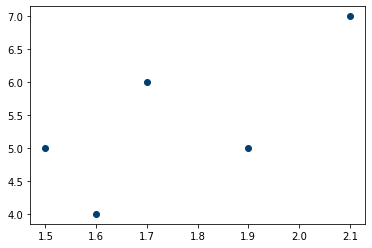

In [ ]:
xs = np.array([1.5,1.6,1.7,1.9,2.1], dtype=np.float64)
ys = np.array([5,4,6,5,7], dtype=np.float64)

plt.scatter(xs,ys,color='#003F72')
plt.show()

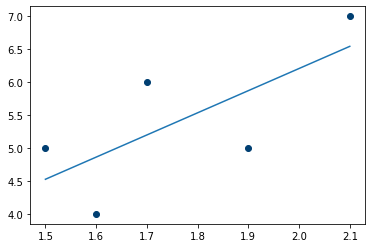

In [ ]:
xs = np.array([1.5,1.6,1.7,1.9,2.1], dtype=np.float64)
ys = np.array([5,4,6,5,7], dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

m, b = best_fit_slope_and_intercept(xs,ys)


regression_line = [(m*x)+b for x in xs]

plt.scatter(xs,ys,color='#003F72')
plt.plot(xs, regression_line)
plt.show()

7.215517241379287


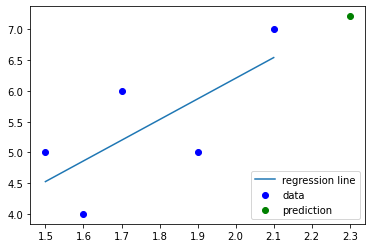

In [ ]:
predict_x = 2.3
predict_y = (m*predict_x)+b
print(predict_y)

plt.scatter(xs,ys,color='blue',label='data')
plt.plot(xs, regression_line, label='regression line')

plt.scatter(predict_x,predict_y, color='green',label='prediction')
plt.legend(loc=4)
plt.show()

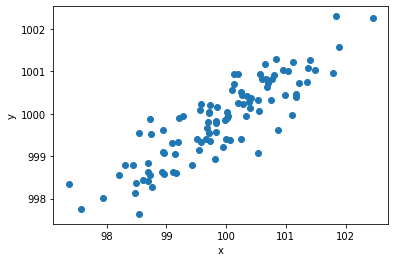

In [ ]:
rng = np.random.RandomState(123)
mean = [100, 1000]
cov = [[1, 0.9], [0.9, 1]]
sample = rng.multivariate_normal(mean, cov, size=100)
x, y = sample[:, 0], sample[:, 1]

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Pearson correlation coefficient

In [ ]:
np.corrcoef(np.vstack([x, y]))

array([[1.        , 0.87552229],
       [0.87552229, 1.        ]])

 Least-squares linear regression via "classic statistic"

In [ ]:
cov_xy = np.cov(np.vstack((x, y)), ddof=0)[0, 1]
var_x = np.var(x, ddof=0)
w1 = cov_xy / var_x
b = np.mean(y) - w1*np.mean(x)

print('slope: %.2f' % w1)
print('y-intercept: %.2f' % b)

slope: 0.84
y-intercept: 915.59


 Least-squares linear regression via linear algebra

In [ ]:
X = x[:, np.newaxis]

# adding a column vector of "ones"
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])

z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))
b, w1 = w[0], w[1]
print('slope: %.2f' % w1)
print('y-intercept: %.2f' % b)

slope: 0.84
y-intercept: 915.59


Using a pre-implemented function

In [ ]:
w = np.polyfit(x, y, deg=1)
b, w1 = w[1], w[0]
print('slope: %.2f' % w1)
print('y-intercept: %.2f' % b)

slope: 0.84
y-intercept: 915.59


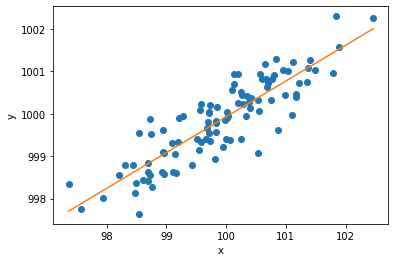

In [ ]:
extremes = np.array([np.min(x), np.max(x)])
predict = extremes*w1 + b

plt.plot(x, y, marker='o', linestyle='')
plt.plot(extremes, predict)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Parametric functions

In [ ]:
# Importing the dataset
dataset = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

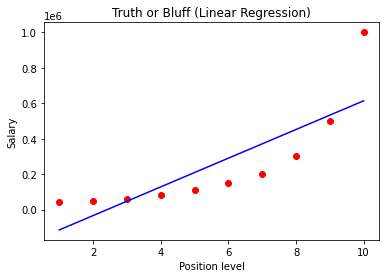

In [ ]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

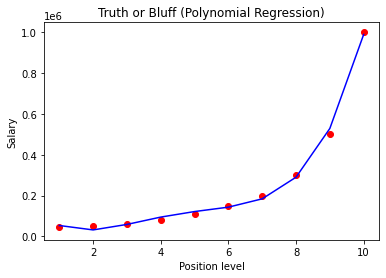

In [ ]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Polynomial Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

Central Limit Theorem

In [ ]:
# build gamma distribution as population
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000000)

# sample from population with different number of sampling
# a list of sample mean
meansample = []
# number of sample
numofsample = [1000,2500,5000,10000,25000,50000]
# sample size
samplesize = 500
# for each number of sampling (1000 to 50000)
for i in numofsample:
    # collect mean of each sample
    eachmeansample = []
    # for each sampling
    for j in range(0,i):
        # sampling 500 sample from population
        rc = random.choices(s, k=samplesize)
        # collect mean of each sample
        eachmeansample.append(sum(rc)/len(rc))
    # add mean of each sampling to the list
    meansample.append(eachmeansample)

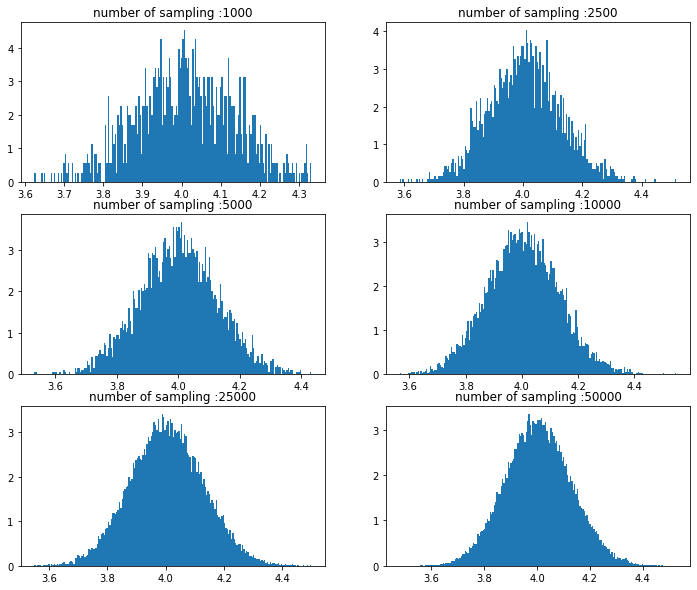

In [ ]:
# plot
cols = 2
rows = 3
fig, ax = plt.subplots(rows, cols, figsize=(12,10))
n = 0
for i in range(0, rows):
    for j in range(0, cols):
        ax[i, j].hist(meansample[n], 200, density=True)
        ax[i, j].set_title(label="number of sampling :" + str(numofsample[n]))
        n += 1

Confidence intervals

In [ ]:
def conf_interval(sample):
    n = len(sample)
    sample_mean = sample.mean()
    t = stats.t.ppf(q = 0.975, df=n-1) 
    sigma = sample.std()/math.sqrt(len(sample))
    margin_of_er = t * sigma # margin of error calculation
    conf = (sample_mean - margin_of_er, sample_mean + margin_of_er)
    return conf

def conf_interval_samples(name_of_sample):
    sample_means = []
    intervals = []
    for sample in range(5):
        #Take a random sample of chosen size without replacement
        sub_sample = np.random.choice(a= name_of_sample, size =   len(name_of_sample)-3, replace=False)
        #Calculate confidence_interval using above function
        confidence_interval = np.array(conf_interval(sub_sample))
        #Calculate the sample mean
        sample_mean = sub_sample.mean()
        #Calculate and append sample means and conf intervals for each iteration
        sample_means.append(sample_mean)
        intervals.append(confidence_interval)
    return sample_means,intervals

In [ ]:
jack = np.array([100,150,236,256,123,123,145,256,164,251,247,123])
lena = np.array([236,125,354,120,98,123,145,236,147,236,258,143])

jack_results = conf_interval_samples(jack)
lena_results = conf_interval_samples(lena)


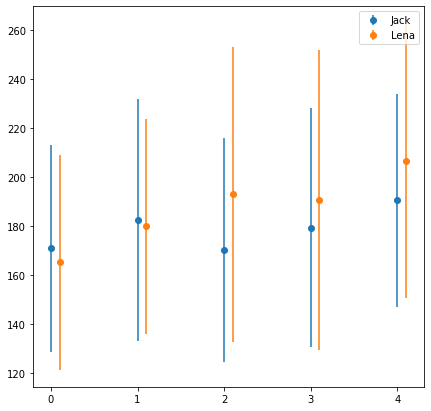

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(x=np.arange(0, 5, 1), y=jack_results[0],
yerr=[(top-bot)/2 for top,bot in jack_results[1]], fmt='o',label='Jack')
plt.errorbar(x=np.arange(0.1, 5.1, 1), y=lena_results[0],
yerr=[(top-bot)/2 for top,bot in lena_results[1]], fmt='o',label='Lena')
plt.legend()
plt.show()

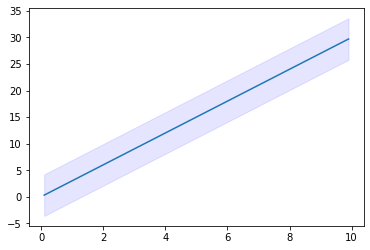

In [ ]:
#some example data
x = np.linspace(0.1, 9.9, 20)
y = 3.0 * x
#some confidence interval
ci = 1.96 * np.std(y)/np.sqrt(len(x))

fig, ax = plt.subplots()
ax.plot(x,y)
ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

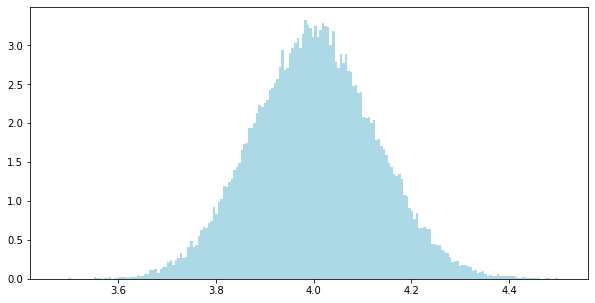

In [ ]:
# use gamma distribution
shape, scale = 2.0, 2.0  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000000)
mu = shape*scale # mean and standard deviation
sigma = scale*np.sqrt(shape)
# create sample mean distribution
meansample = []
# sample size
samplesize = 500
for j in range(0,50000):
    # sampling 500 sample from population
    rc = random.choices(s, k=samplesize)
    # collect mean of each sample
    meansample.append(sum(rc)/len(rc))
plt.figure(figsize=(10,5))
plt.hist(meansample, 200, density=True, color='lightblue')
plt.show()

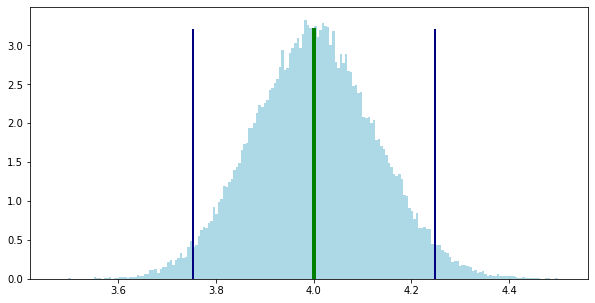

In [ ]:
# set mean and 95% probability
plt.figure(figsize=(10,5))
plt.hist(meansample, 200, density=True, color='lightblue')
plt.plot([mu,mu],[0, 3.2], 'k-', lw=4, color='green')
plt.plot([mu-(1.96*sigma/np.sqrt(samplesize)),mu-(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=2, color='navy')
plt.plot([mu+(1.96*sigma/np.sqrt(samplesize)),mu+(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=2, color='navy')
plt.show()

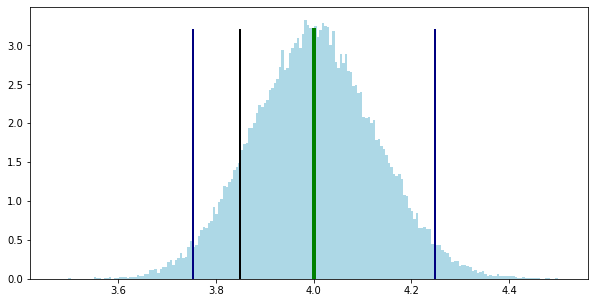

In [ ]:
# suppose that we sample 500 data that has a mean as 3.85
# Xbar mean = 3.85, sigma = sigma/np.sqrt(samplesize)
m, ss = 3.85, sigma/np.sqrt(samplesize) # mean and standard deviation
plt.figure(figsize=(10,5))
plt.hist(meansample, 200, density=True, color='lightblue')
plt.plot([mu,mu],[0, 3.2], 'k-', lw=4, color='green')
plt.plot([mu-(1.96*sigma/np.sqrt(samplesize)),mu-(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=2, color='navy')
plt.plot([mu+(1.96*sigma/np.sqrt(samplesize)),mu+(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=2, color='navy')
plt.plot([m,m],[0, 3.2], 'k-', lw=2, color='black')
plt.show()

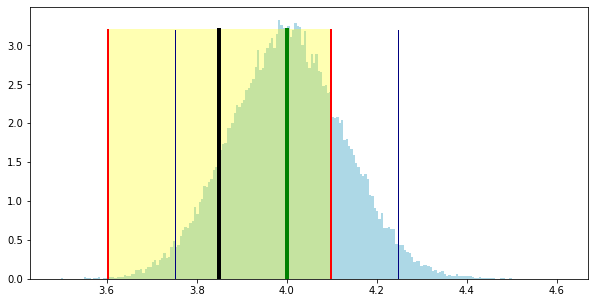

In [ ]:
# the interval we create cover the population mean because it is within 95% range from population mean
plt.figure(figsize=(10,5))
plt.hist(meansample, 200, density=True, color='lightblue')
plt.plot([mu,mu],[0, 3.2], 'k-', lw=4, color='green')
plt.plot([mu-(1.96*sigma/np.sqrt(samplesize)),mu-(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=1, color='navy')
plt.plot([mu+(1.96*sigma/np.sqrt(samplesize)),mu+(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=1, color='navy')
plt.plot([m,m],[0, 3.2], 'k-', lw=4, color='black')
plt.plot([m-(1.96*ss),m-(1.96*ss)],[0, 3.2], 'k-', lw=2, color='red')
plt.plot([m+(1.96*ss),m+(1.96*ss)],[0, 3.2], 'k-', lw=2, color='red')
# Create a Rectangle patch
plt.gca().add_patch(plt.Rectangle((m-(1.96*ss), 0),2*(1.96*ss),3.21, fill=True, linewidth=3, fc=(1,1,0,0.3)))
plt.xlim(3.43, 4.67) 
plt.show()

number of interval that cover the expected values: 94


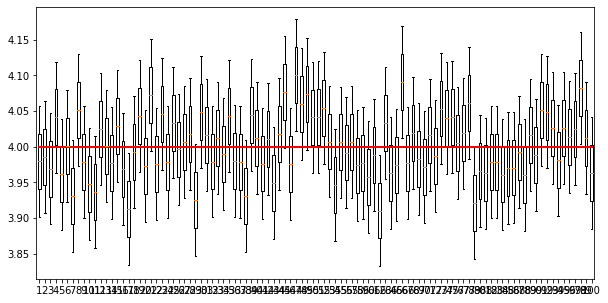

In [ ]:
# simulate 100 interval with 5,000 sample size
mu = shape*scale # mean
sigma = scale*np.sqrt(shape) # standard deviation
intervallist = []
k = 1.96
# sample size
samplesize = 5000
# start count
c = 0
for i in range(0,100):
    # sample 100 sample
    rs = random.choices(s, k=samplesize)
    # calculate mean
    mean = np.mean(rs)
    upbound = mean + k*sigma/np.sqrt(samplesize)
    lowbound = mean - k*sigma/np.sqrt(samplesize)
    # collect difference between sample mean and mu
    intervallist.append([lowbound,mean,upbound])
    if upbound >= mu and lowbound <= mu:
        c += 1
        
print("number of interval that cover the expected values:", c)
# set figure size.
plt.figure(figsize=(10,5))
# plot box plots of each sample mean.
plt.boxplot(intervallist)
plt.plot([1, 100],[mu,mu], 'k-', lw=2, color='red')
# show plot.
plt.show()

number of interval that cover the expected values: 96


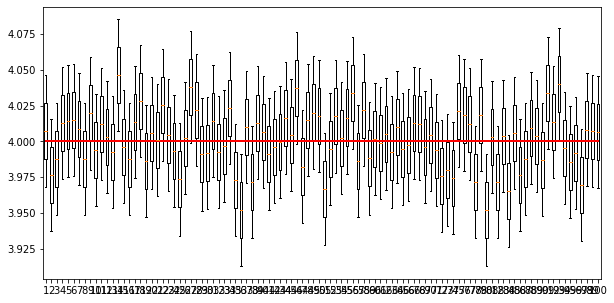

In [ ]:
# simulate 100 interval with 20,000 sample size
intervallist = []
# sample size
samplesize = 20000
# start count
c = 0
for i in range(0,100):
    # sample 100 sample
    rs = random.choices(s, k=samplesize)
    # calculate mean
    mean = np.mean(rs)
    upbound = mean + k*sigma/np.sqrt(samplesize)
    lowbound = mean - k*sigma/np.sqrt(samplesize)
    # collect difference between sample mean and mu
    intervallist.append([lowbound,mean,upbound])
    if upbound >= mu and lowbound <= mu:
        c += 1
        
print("number of interval that cover the expected values:", c)
# set figure size.
plt.figure(figsize=(10,5))
# plot box plots of each sample mean.
plt.boxplot(intervallist)
plt.plot([1, 100],[mu,mu], 'k-', lw=2, color='red')
# show plot.
plt.show()

Hypothesis testing with Bootstrapping

In [ ]:
data = pd.read_csv("/content/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


[Text(0, 0, 'Female'), Text(0, 0, 'Male')]

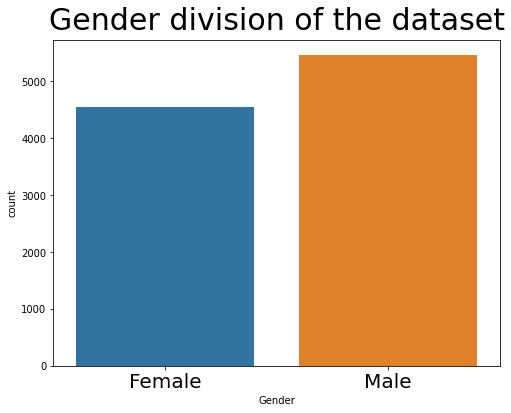

In [ ]:
data.Exited.value_counts()
plt.figure(figsize=(8, 6))
exited_plot = sns.countplot(x=data.Gender)
exited_plot.set_title('Gender division of the dataset',
                      fontsize=30,
                      pad=10)
exited_plot.set_xticklabels(['Male', 'Female'], fontsize=20)

In [ ]:
exited = data.loc[data['Exited'] == 1]
exited.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


[Text(0, 0, 'Female'), Text(0, 0, 'Male')]

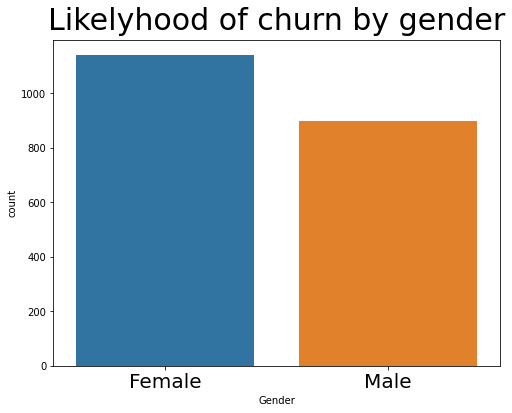

In [ ]:
data.Exited.value_counts()
plt.figure(figsize=(8, 6))
exited_plot = sns.countplot(x=exited.Gender)
exited_plot.set_title('Likelyhood of churn by gender',
                      fontsize=30,
                      pad=10)
exited_plot.set_xticklabels(['Male', 'Female'], fontsize=20)

In [ ]:
def bootstrap(gender_df):
    gender_list = []
    for i in range(200):
        #initializing a new df
        gender_bootstrap_df = pd.DataFrame([], columns = gender_df.columns)

        # generating 500 random indices from mens datapoints
        list_idx_gender = np.random.randint(low = 0, high = len(gender_df.index), size = 500)

        # use those indices to create a new dataset
        for i in list_idx_gender:
            gender_bootstrap_df = gender_bootstrap_df.append(gender_df.iloc[i])

        # for each of the new datasets, we calculate the sample statistic 
        var = len(gender_bootstrap_df[gender_bootstrap_df['Exited'] == 1])
        
        #  finally, we add the population statistic to a list
        gender_list.append(np.round((var/500)*100))
    return gender_list


In [ ]:
men_df = data.loc[data['Gender'] == "Male"]
men_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0
10,11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0


In [ ]:
women_df = data.loc[data['Gender'] == "Female"]
women_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
men_list = bootstrap(men_df)
women_list = bootstrap(women_df)

In [ ]:
men_list[:5]

[15.0, 16.0, 15.0, 16.0, 15.0]

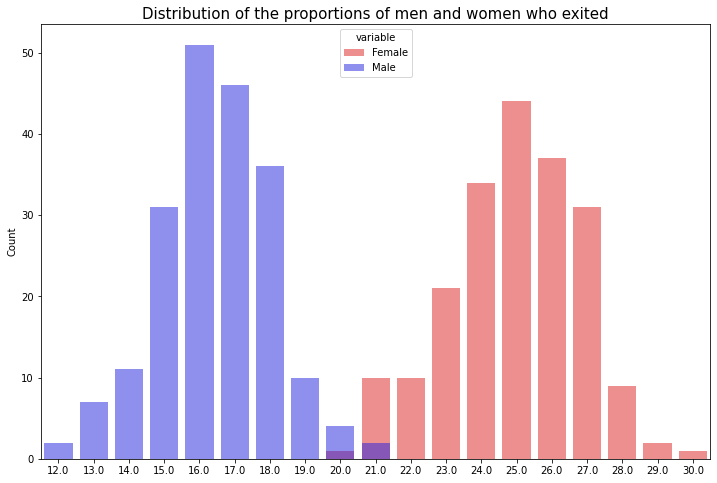

In [ ]:
#convert the lists to series and get the counts
first_list = pd.Series(
    women_list
).value_counts()

second_list = pd.Series(
    men_list
).value_counts()

#get the counts as a dataframe
df=pd.concat([first_list, second_list], axis=1)
df.columns=['Female', 'Male']

# melt the data frame so it has a "tidy" data format
df=df.reset_index().melt(id_vars=['index'])
plt.figure(figsize = (12,8))
#plot a bar graph and assign variable to hue
barplot = sns.barplot(
    x='index',
    y='value',
    hue='variable',
    data=df,
    palette=['red','blue'],
    alpha=.5,
    dodge=False,
)

barplot.set_title('Distribution of the proportions of men and women who exited',
                      fontsize=15,
                      pad=5)

barplot.set(ylabel="Count", xlabel="")
plt.show()

In [ ]:
men_dist = []
women_dist = []
for i in range(10000):
    # 0.835 of the total men remained while the rest left; weights of probability are set accordingly. 
    men_dist.append(np.random.choice([0, 1], p = [.835, 1 - .835], size = 1000))
    # similar to men, 0.749 of the total women remained while the rest left. 
    women_dist.append(np.random.choice([0, 1], p = [.749,1 - .749], size = 1000))

In [ ]:
men_dist2 = []
for i in range(len(men_dist)):
  men_dist2.append(list(men_dist[i]).count(1))

women_dist2 = []
for i in range(len(women_dist)):
  women_dist2.append(list(women_dist[i]).count(1))


2507459

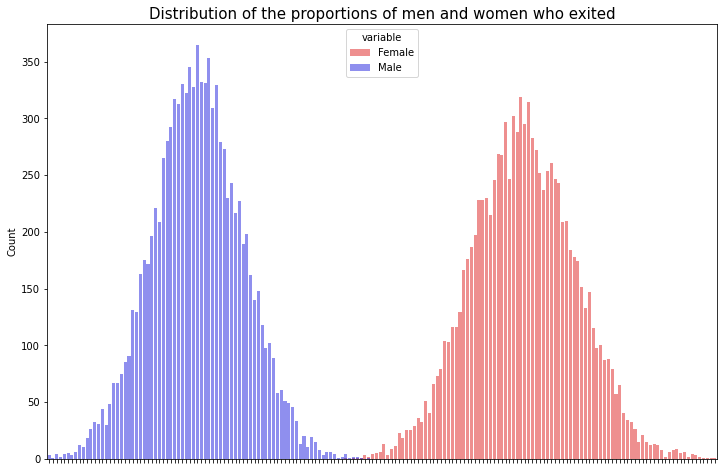

In [ ]:
#convert the lists to series and get the counts
first_list = pd.Series(
    women_dist2
).value_counts()

second_list = pd.Series(
    men_dist2
).value_counts()

#get the counts as a dataframe
df=pd.concat([first_list, second_list], axis=1)
df.columns=['Female', 'Male']

# melt the data frame so it has a "tidy" data format
df=df.reset_index().melt(id_vars=['index'])
plt.figure(figsize = (12,8))

#plot a bar graph and assign variable to hue
barplot = sns.barplot(
    x='index',
    y='value',
    hue='variable',
    data=df,
    palette=['red','blue'],
    alpha=.5,
    dodge=False,
)

barplot.set_title('Distribution of the proportions of men and women who exited',
                      fontsize=15,
                      pad=5)

barplot.set(ylabel="Count", xlabel="", xticklabels=[])
plt.show()

T-test

t = (mean(X1) - mean(X2)) / std_error_diff

std_error_diff = sqrt(se1^2 + se2^2)

se = std / sqrt(n)

In [13]:
# generate two independent samples
data1 = 5 * np.random.randn(100) + 50
data2 = 5 * np.random.randn(100) + 51

In [66]:
# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
  # calculate means
  mean1, mean2 = mean(data1), mean(data2)

  # calculate sample standard deviations
  std1 = np.std(data1)
  std2 = np.std(data2)

  # calculate standard errors
  n1, n2 = len(data1), len(data2)
  se1, se2 = std1/math.sqrt(n1), std2/math.sqrt(n2)

  # se1, se2 = sem(data1), sem(data2)

  # standard error on the difference between the samples
  sed = math.sqrt(se1**2.0 + se2**2.0)

  # calculate the t statistic
  t_stat = (mean1 - mean2) / sed

  # degrees of freedom
  df = len(data1) + len(data2) - 2

  # calculate the critical value
  cv = stats.t.ppf(1.0 - alpha, df)

  # calculate the p-value
  p = (1.0 - stats.t.cdf(abs(t_stat), df)) * 2.0
  
  # return everything
  return t_stat, df, cv, p

In [68]:
alpha = 0.05
t_stat, df, cv, p = independent_ttest(data1, data2, alpha)
print(f"T-statistic = {t_stat:.4f}, Degrees of freedom = {df}, Critical value = {cv:.4f}, p = {p:.4f}.")


T-statistic = -0.7722, Degrees of freedom = 198, Critical value = 1.6526, p = 0.4409.


In [71]:
stat, p = ttest_ind(data1, data2)
print(f"T-statistic = {stat:.4f}, p = {p:.4f}")

T-statistic = -0.7683, p = 0.4432


In [72]:
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

Accept null hypothesis that the means are equal.


In [73]:
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

Accept null hypothesis that the means are equal.


In [75]:
# function for calculating the t-test for two dependent samples
def dependent_ttest(data1, data2, alpha):
	# calculate means
	mean1, mean2 = mean(data1), mean(data2)
 
	# number of paired samples
	n = len(data1)
 
	# sum squared difference between observations
	d1 = sum([(data1[i]-data2[i])**2 for i in range(n)])
 
	# sum difference between observations
	d2 = sum([data1[i]-data2[i] for i in range(n)])
 
	# standard deviation of the difference between means
	sd = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
 
	# standard error of the difference between the means
	sed = sd / np.sqrt(n)
 
	# calculate the t statistic
	t_stat = (mean1 - mean2) / sed

	# degrees of freedom
	df = n - 1

	# calculate the critical value
	cv = stats.t.ppf(1.0 - alpha, df)
 
	# calculate the p-value
	p = (1.0 - stats.t.cdf(abs(t_stat), df)) * 2.0

	# return everything
	return t_stat, df, cv, p

In [76]:
alpha = 0.05
t_stat, df, cv, p = dependent_ttest(data1, data2, alpha)
print(f"T-statistic = {t_stat:.4f}, Degrees of freedom = {df}, Critical value = {cv:.4f}, p = {p:.4f}.")


T-statistic = -0.8339, Degrees of freedom = 99, Critical value = 1.6604, p = 0.4064.


In [80]:
stat, p = ttest_rel(data1, data2)
print(f"T-statistic = {stat:.4f}, p = {p:.4f}")

T-statistic = -0.8339, p = 0.4064


In [81]:
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

Accept null hypothesis that the means are equal.


In [82]:
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

Accept null hypothesis that the means are equal.
